In [1]:
from beta_TCVAE import beta_TCVAE
beta_TCVAE = beta_TCVAE( training =False, lr=0.001)

Load_image_dataset?[yes/no] yes
loading completed.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.batch_normalization instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use keras.layers.conv2d_transpose instead.
Instructions for updating:
Use tf.cast instead.


In [ ]:
beta_TCVAE.fit(epoch=300)
beta_TCVAE.Save()

  0%|          | 0/300 [00:00<?, ?it/s]

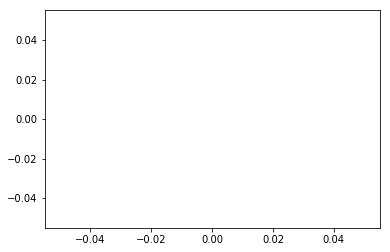

In [12]:
import matplotlib.pyplot as plt
plt.plot(beta_TCVAE.loss_list)
plt.show()

In [3]:
beta_TCVAE.Save()

####  求总体样本的均值,方差

In [64]:
from tqdm import tqdm
dataset=[]
for i in tqdm(range(20608)):
    tran_file_path = \
            '/home/baxter/catkin_ws/src/huang/scripts/explore_transitions/exp_transition%d.npy' \
            % (i + 1)
    transition = np.load(tran_file_path, allow_pickle=True)
    transition = transition.tolist()
    dataset.append(transition['observe0_img'][:,:,[2,1,0]])
    dataset.append(transition['observe1_img'][:,:,[2,1,0]])
dataset = np.array(dataset, dtype=np.float32)

mean = dataset.mean() # 116.73773
std = dataset.std()  # 57.21839
print mean
print std

100%|██████████| 20608/20608 [00:14<00:00, 1390.40it/s]


116.77986
57.100357


In [2]:
mean = 116.77986
std = 57.100357

In [3]:
beta_TCVAE.load()

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /home/baxter/Documents/beta-vae/checkpoints/model.ckpt


In [2]:
import numpy as np
tran_file_path = \
                '/home/baxter/catkin_ws/src/huang/scripts/demo_transitions/demo1.npy'
transition = np.load(tran_file_path, allow_pickle=True)
transition = transition.tolist()
image_test = transition['observe1_img'][:,:,[2,1,0]]
z = beta_TCVAE.image_disentangle(image_test)
print z
image = beta_TCVAE.image_test(image_test)
print image.shape

disentangle to vector z
[[0.        0.        0.9341992 0.        0.        0.        0.
  0.        0.8687641 0.       ]]
reconstruct image which has been processed by inverse Z-score
(256, 256, 3)


In [15]:
z = tf.zeros([5,1,1,512])

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    print sess.run(net).shape

Instructions for updating:
Use `tf.global_variables_initializer` instead.
(5, 6, 6, 512)


reconstruct image which has been processed by inverse Z-score


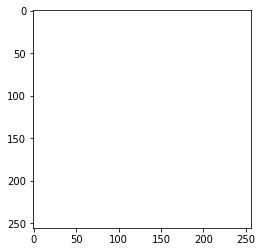

In [7]:
import matplotlib.pyplot as plt
plt.imshow(beta_TCVAE.image_test(image_test))
plt.show()